   
# Description

Un *dictionnaire*, ou *table d'association* est un type de données associant un ensemble de clés à un ensemble de valeurs.

Formellement, si $C$ est un ensemble des clés et $V$ un ensemble de valeurs, une table d'associations est une partie $T$ de $C \times V$ tel que pour toute clé $c \in C$, il existe *au plus* un élément $v \in V$ tel que $(c,v) \in T$.

Les opérations sur une table d'association sont en général les suivantes :

- création d'une table d'association vide ;
- ajout d'une nouvelle paire $(c,v)$ ;
- suppression d'une paire $(c,v)$ ;
- lecture de la valeur associée à une clé.

# Listes d'associations

Une première idée consiste à utiliser une liste pour stocker les couples $(c,v)$. La structure de liste est une structure persistante ; on fait ci-dessous le choix d'une implémentation impérative des tables d'associations, en utilisant un type enregistrement avec un champ mutable.

Dans ce qui suit, lorsqu'on ajoute un couple $(c,v)$ pour une clé $c$ déjà présente dans la liste, la valeur précédente est remplacée.

In [6]:
type ('a, 'b) entree = {cle : 'a ; valeur : 'b};;
type ('a, 'b) table = {mutable contenu : ('a, 'b) entree list};;

type ('a, 'b) entree = { cle : 'a; valeur : 'b; }


type ('a, 'b) table = { mutable contenu : ('a, 'b) entree list; }


In [7]:
let creer_table () =
  {contenu = []}
;;

val creer_table : unit -> ('a, 'b) table = <fun>


In [8]:
let ajouter tbl c v =
  let rec aux l =
    match l with
    | [] -> [{cle = c ; valeur = v}]
    | t::q -> if t.cle = c
              then {cle = c; valeur = v}::q
              else t::(aux q)
  in tbl.contenu <- aux tbl.contenu
;;

val ajouter : ('a, 'b) table -> 'a -> 'b -> unit = <fun>


In [9]:
let supprimer tbl c =
  let rec aux l =
    match l with
    | [] -> []
    | t::q -> if t.cle = c
              then q
              else t::(aux q)
  in tbl.contenu <- aux tbl.contenu
;;

val supprimer : ('a, 'b) table -> 'a -> unit = <fun>


In [10]:
let trouver tbl c =
  let rec aux l =
    match l with
    | [] -> failwith "Non trouvé"
    | t::q -> if t.cle = c
              then t.valeur
              else aux q
  in aux tbl.contenu
;;

val trouver : ('a, 'b) table -> 'a -> 'b = <fun>


Les opérations d'ajout, de suppression et de lecture sont alors en complexité linéaire par rapport au nombre d'éléments présents dans la table.

Pour améliorer la complexité de l'ajout, on peut ajouter l'élément en tête de liste, sans vérifier si la clé est déjà présente. La complexité de l'ajout devient alors un $O(1)$, mais la table peut alors contenir plusieurs fois la même clé, et en cas de suppression, ce sera la valeur la plus récente qui sera supprimée de la table.

# Arbres binaires de recherche

Un *arbre binaire de recherche* est un arbre binaire dont les étiquettes appartiennent à un ensemble $X$ ordonné et tel que pour tout nœud $N$, l'étiquette de $N$ est supérieure ou égale à toutes les étiquettes présentes dans le fils gauche de $N$ et inférieure ou égale à toutes les étiquettes présentes dans le fils droit de $N$.

Par exemple, l'arbre ci-dessous est un arbre binaire de recherche : 

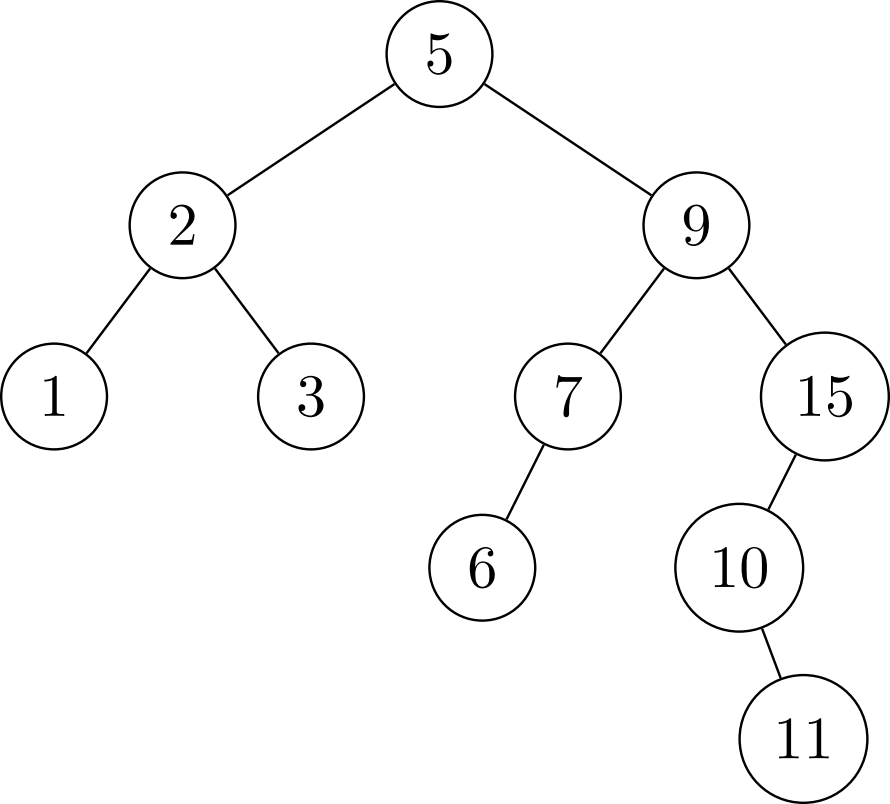

En étiquetant les nœuds par des couples $(c,v)$ et en considérant un ordre sur les clés, il est alors possible d'implémenter une structure immuable de dictionnaires, pour laquelle la complexité de la recherche sera linéaire par rapport à la hauteur de l'arbre.

*Cette implémentation sera développée dans le TP n°5.*

# Tables de hachage

L'idéal serait de représenter la table d'association $T$ à l'aide d'un tableau de taille $n$ où $n$ est le nombre total de clés de l'ensemble $C$, en utilisant une fonction $h : C \to ⟦ 0, n-1 ⟧$ qui à chaque clé associerait un indice du tableau. Ainsi, la lecture, l'ajout et la suppression se feraient en temps constant.

Néanmoins, en pratique, l'ensemble $C$ est de taille trop importante, et les clés réellement utilisées ne représentent qu'une petite partie de l'ensemble $C$.

Par conséquent, on utilise un tableau de taille $m$ avec $m \ll n$ et une fonction ${h : C \mapsto ⟦ 0, m-1 ⟧}$, appelée *fonction de hachage*, et qui doit respecter autant que possible les contraintes suivantes :

- être facile à calculer (pour limiter la complexité) ;
- avoir une distribution d'apparence uniforme.

Ce dernier point a pour objectif de limiter le nombre de *collisions*, une collision étant une situation dans laquelle deux clés ont la même image par $h$. Dès lors que $m < n$, les collisions sont inévitables, mais il faudrait que la fonction $h$ assure une bonne répartition des clés dans le tableau.

Les deux points à étudier sont :

- le choix de la fonction de hachage ;
- le comportement à adopter en cas de collision.


Si toutes les clés sont connues à l'avance, il est possible de construire une fonction de hachage sans collision.

Ce n'est pas forcément le cas, et on utilisera généralement une heuristique basée sur la nature des clés.


Les fonctions de hachage présentées ci-dessous supposent que les clés sont des entiers. Dans le cas contraire, on utilisera préalablement une fonction de *codage*, c'est-à-dire une fonction injective de $C$ dans $\mathbb{N}$.

Par exemple, un caractère pourra être associé son code ASCII. Une chaîne $s_0\dots s_{n-1}$ pourra être associée à l'entier $\displaystyle \sum_{k=0}^{n-1} a_k 256^k$ où $a_k$ est le code ASCII du caractère $s_k$.



Un exemple simple de fonction de hachage est la fonction $h : c \mapsto c \, \mathrm{mod}\, m$. 

Certaines valeurs de $m$ sont à éviter :

- Si $m=2^p$, alors $h(c)$ ne dépend que des $p$ bits de poids faibles de $c$, ce qui risque de conduire à une mauvaise répartition des clés. Par exemple, dans le cas des chaînes de caractères, si $m =256$, alors $h(c)$ ne dépend que du premier caractère de la chaîne.
- Si $m=2^p-1$, alors une permutation des paquets de $p$ bits consécutifs de $c$ ne modifie pas la valeur de $h(c)$, ce qu'on préfère éviter.


En général, on choisit pour $m$ un nombre premier.

Les collisions restent néanmoins inévitables. Plutôt que de stocker au plus un couple $(c,v)$ dans chaque case du tableau, ce qui ne permet pas de stocker deux éléments dont les clés sont distinctes mais ont la même image par $h$, on peut stocker dans la case d'indice $i$ la liste des éléments dont les clés ont pour image $i$ par la fonction $h$.

*Cette implémentation sera développée dans le TP n°5.*

# Module `Hashtbl`

OCaml dispose d'un module `Hashtbl` permettant d'utiliser des tables de hachage et des fonctions de hachage :

- `Hashtbl.create n` crée une nouvelle table de hachage dont la taille initiale est $n$.
- `Hashtbl.add tbl c v` ajoute le couple $(c,v)$ à la table `tbl`. Si la clé $c$ s'y trouve déjà, alors l'ancienne valeur n'est pas supprimée mais juste cachée.
- `Hashtbl.find tbl c` renvoie la valeur courante associée à la clé $c$ si elle existe, ou lève l'exception `Not_Found` ; `Hashtbl.find_all tbl c` renvoie la liste de toutes les valeurs associées à la clé $c$.
- `Hashtbl.remove tbl c` supprime la valeur courante associée à la clé $c$ si elle existe, et ne fait rien sinon.